#Fashion MNIST
Fashion Mnist는 옷, 바지 등 10가지 종류의 의류로 구성된 데이터입니다. 이 데이터는 (28, 28) 크기로 구성되어 있으며 Training Set 6만장, Test Set 1만장으로 총합 7만장으로 이루어져 있습니다. Keras에서 dataset을 import 할 수 있고, 처음 import 시 다운로드 하는 과정이 추가됩니다.

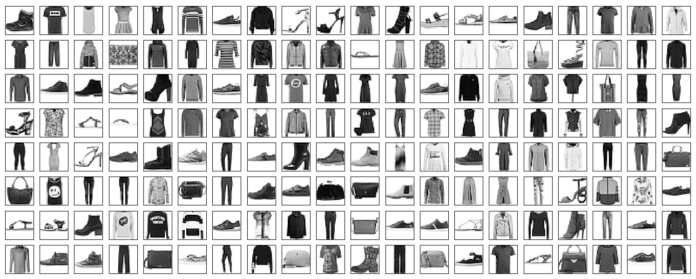


## 데이터 로드

In [21]:
import tensorflow as tf
(train_input, train_target),(test_input, test_target)  = tf.keras.datasets.fashion_mnist.load_data()

### 데이터 shape 확인

In [22]:
print(train_input.shape, test_input.shape)

(60000, 28, 28) (10000, 28, 28)


### 이미지 출력 
#### 10 x 5로 이미지 출력
#### cmap='gray_r'  

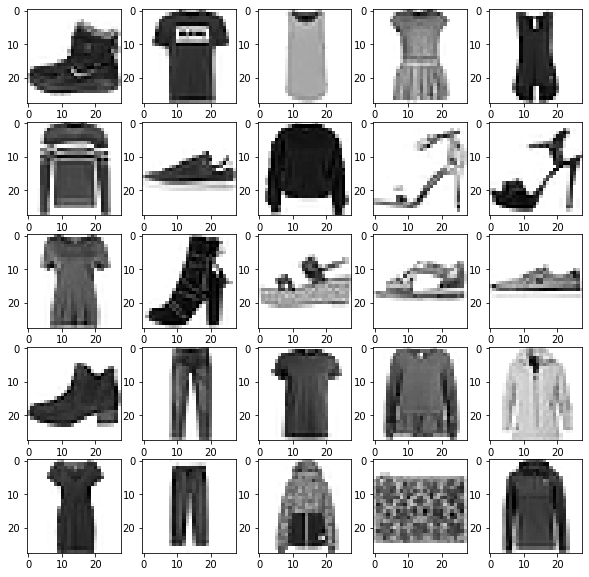

In [23]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 5, figsize = (10, 10) )
for i in range(5):
  for j in range(5):
    '''
    plt.subplot(5, 5, 5*i + j + 1)
    plt.imshow(train_input[5*i + j], cmap='gray_r')'''
    axs[i, j].imshow(train_input[i*5 + j], cmap='gray_r')
plt.show()

## class 확인

In [24]:
items = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress',
         4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 
         8:'Bag', 9:'Ankel boot'}

In [25]:
train_target[:25]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4], dtype=uint8)

In [26]:
'''for i in range(25):
  print(items[train_target[i+1]])'''
print([items[i] for i in train_target[0:25]])

['Ankel boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal', 'T-shirt/top', 'Ankel boot', 'Sandal', 'Sandal', 'Sneaker', 'Ankel boot', 'Trouser', 'T-shirt/top', 'Shirt', 'Coat', 'Dress', 'Trouser', 'Coat', 'Bag', 'Coat']


In [27]:
import numpy as np
np.unique(train_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [28]:
np.unique(train_target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 검증데이터(validation data) 생성

In [29]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 11)

In [30]:
print(train_input.shape, val_input.shape, test_input.shape)

(48000, 28, 28) (12000, 28, 28) (10000, 28, 28)


## one-hot encoding

In [31]:
train_target_OHE = tf.keras.utils.to_categorical(train_target, num_classes = 10)
val_target_OHE = tf.keras.utils.to_categorical(val_target, num_classes= 10)
test_target_OHE = tf.keras.utils.to_categorical(test_target, num_classes = 10)

## 정규화(Normalization)

In [32]:
train_scaled = train_input/255
val_scaled = val_input / 255
test_scaled = test_input / 255

## 직렬화

In [33]:
train_scaled_LIN = train_scaled.reshape(-1, 28*28)
val_scaled_LIN = val_scaled.reshape(-1, 28*28)
test_scaled_LIN = test_scaled.reshape(-1, 28*28)

In [34]:
print(train_scaled_LIN.shape)

(48000, 784)


## model 생성

In [35]:
from tensorflow.keras import layers, models

In [36]:
model = models.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(784,)), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(32, activation='relu'), 
    layers.Dense(10, activation = 'softmax')
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss = 'categorical_crossentropy', metrics = 'acc')

## 학습

In [39]:
history = model.fit(train_scaled_LIN, train_target_OHE, epochs = 30, validation_data = (val_scaled_LIN, val_target_OHE))

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 0.5673 - acc: 0.7935 - val_loss: 0.4854 - val_acc: 0.8229
Epoch 2/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4071 - acc: 0.8499 - val_loss: 0.3901 - val_acc: 0.8649
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3682 - acc: 0.8632 - val_loss: 0.3560 - val_acc: 0.8729
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3426 - acc: 0.8740 - val_loss: 0.3507 - val_acc: 0.8748
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3248 - acc: 0.8811 - val_loss: 0.3484 - val_acc: 0.8758
Epoch 6/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3123 - acc: 0.8852 - val_loss: 0.3433 - val_acc: 0.8794
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3037 - acc: 0.8906 - val_loss: 0.3546 - val_acc: 0.8777
Epoch 8/30
1500/1500 [==============================] - 6s 4ms

## 학습곡선

In [40]:
history.history

{'acc': [0.793541669845581,
  0.8499166369438171,
  0.8631874918937683,
  0.8739583492279053,
  0.8810833096504211,
  0.8851875066757202,
  0.8906458616256714,
  0.8939375281333923,
  0.8958333134651184,
  0.898729145526886,
  0.8994583487510681,
  0.9022708535194397,
  0.9032291769981384,
  0.9049791693687439,
  0.9049583077430725,
  0.9077708125114441,
  0.9089999794960022,
  0.9106458425521851,
  0.9102291464805603,
  0.9134791493415833,
  0.9133124947547913,
  0.9134374856948853,
  0.9154166579246521,
  0.9167708158493042,
  0.9157500267028809,
  0.9182500243186951,
  0.9184374809265137,
  0.9195416569709778,
  0.9225000143051147,
  0.9223541617393494],
 'loss': [0.5673435926437378,
  0.4071163833141327,
  0.3682055175304413,
  0.34257596731185913,
  0.3247566521167755,
  0.3122817873954773,
  0.3036660850048065,
  0.29451143741607666,
  0.2870754599571228,
  0.28337550163269043,
  0.277159720659256,
  0.2697097361087799,
  0.26894158124923706,
  0.2637476325035095,
  0.26365178823

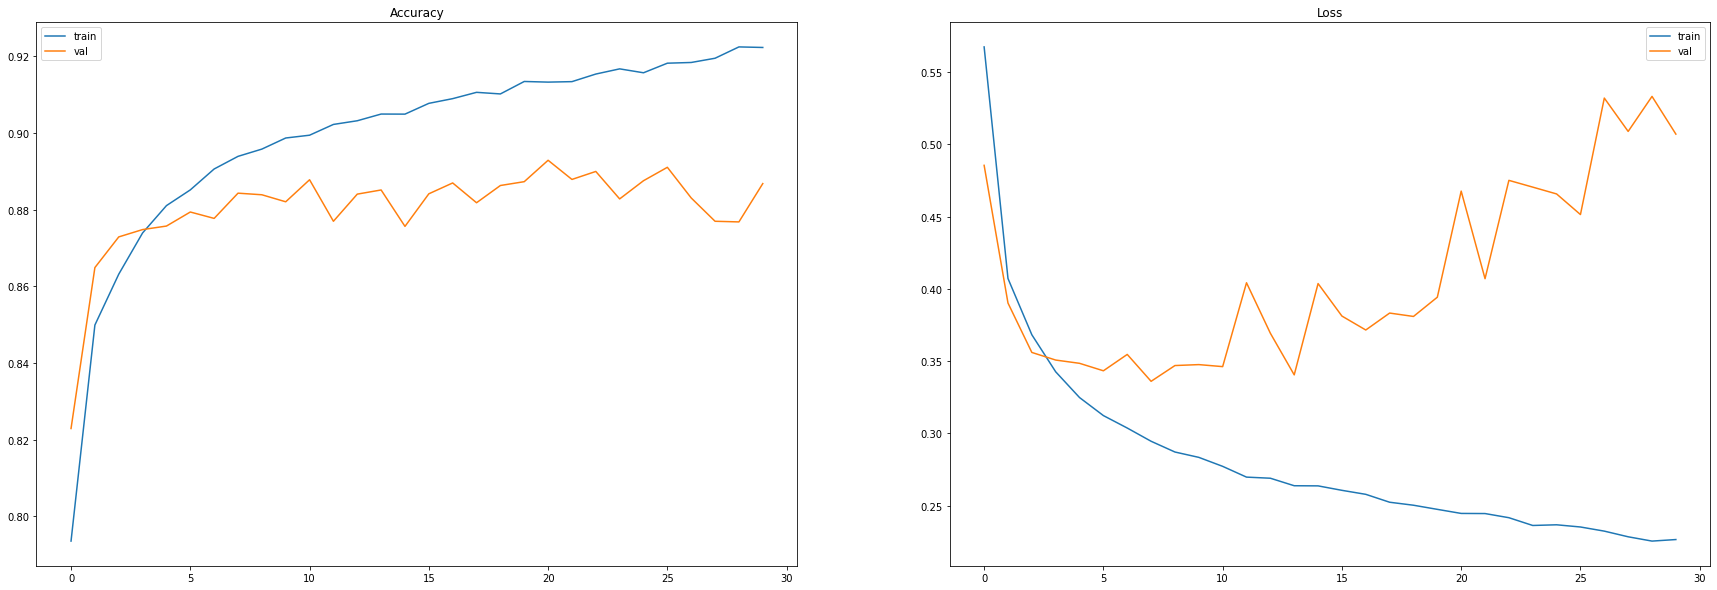

In [41]:
plt.figure(figsize = (30, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'val'])
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.title('Loss')

plt.show()

## 과대적합(Over fitting)/과소적합(Under fitting)

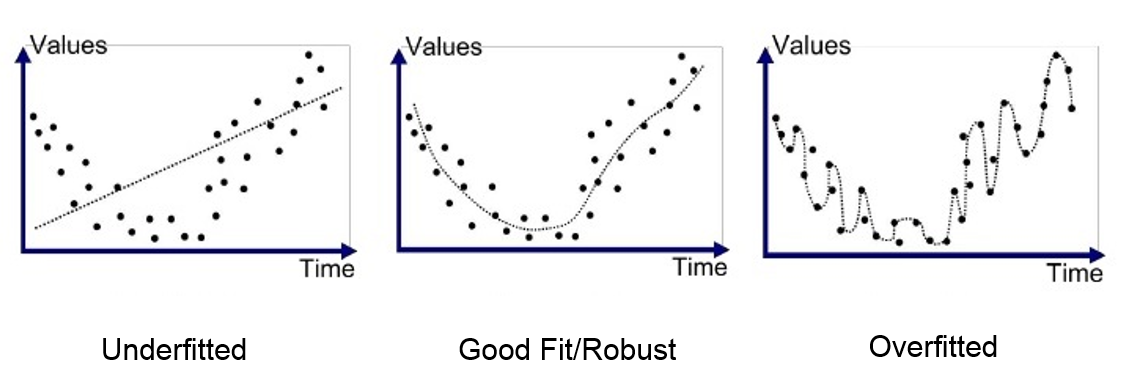

In [42]:
model1 = models.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(784,)), 
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'), 
    layers.Dense(32, activation='relu'), 
    layers.Dense(10, activation = 'softmax')
])

In [43]:
model1.compile(loss = 'categorical_crossentropy', metrics = 'acc')

In [44]:
history1 = model1.fit(train_scaled_LIN, train_target_OHE, epochs = 30, validation_data = (val_scaled_LIN, val_target_OHE))

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6304 - acc: 0.7728 - val_loss: 0.4457 - val_acc: 0.8394
Epoch 2/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4524 - acc: 0.8342 - val_loss: 0.4170 - val_acc: 0.8537
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4178 - acc: 0.8482 - val_loss: 0.3745 - val_acc: 0.8661
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3961 - acc: 0.8569 - val_loss: 0.3706 - val_acc: 0.8663
Epoch 5/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3818 - acc: 0.8626 - val_loss: 0.3679 - val_acc: 0.8737
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3712 - acc: 0.8662 - val_loss: 0.3709 - val_acc: 0.8717
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3633 - acc: 0.8694 - val_loss: 0.3508 - val_acc: 0.8766
Epoch 8/30
1500/1500 [==============================] - 5s 4ms

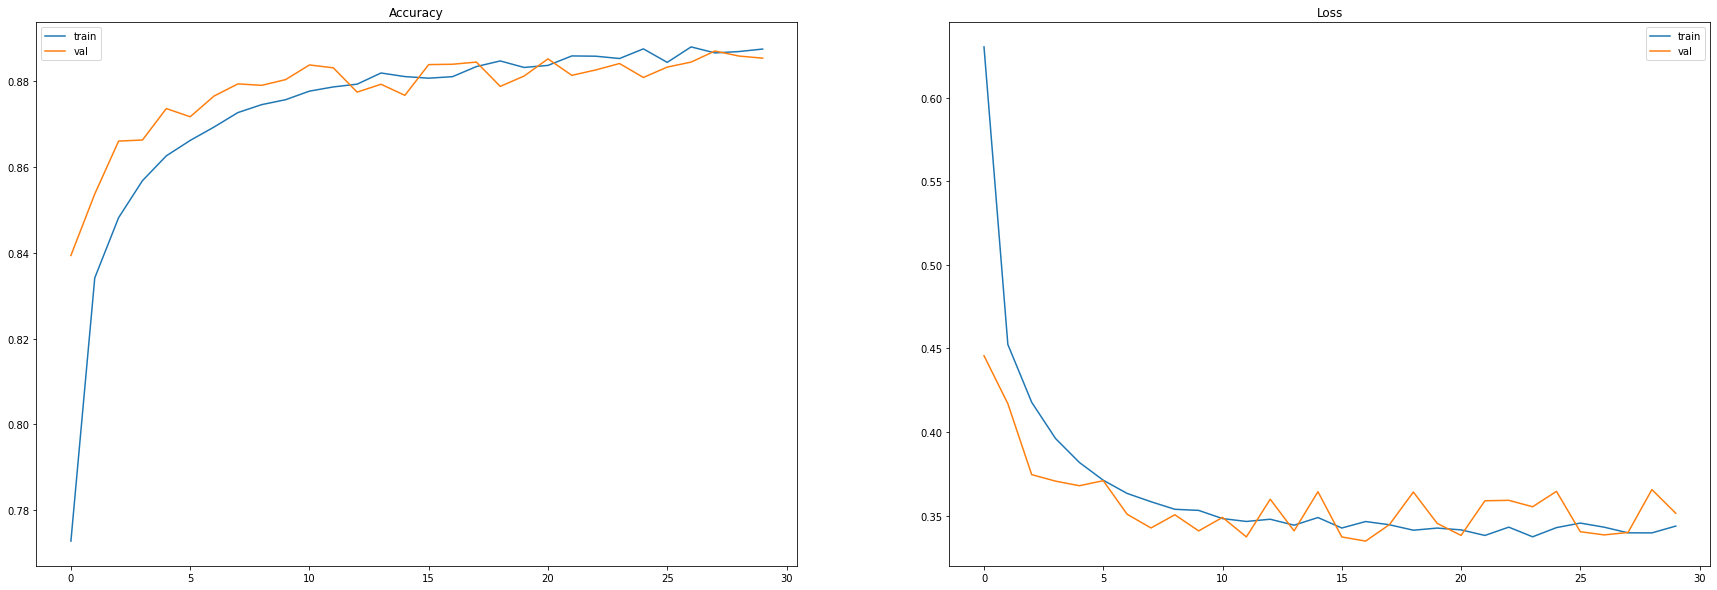

In [45]:
plt.figure(figsize = (30, 10))
plt.subplot(1, 2, 1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.legend(['train', 'val'])
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train', 'val'])
plt.title('Loss')

plt.show()

In [46]:
model1.evaluate(test_scaled_LIN, test_target_OHE)

313/313 [==============================] - 1s 3ms/step - loss: 0.3771 - acc: 0.8742


[0.37710118293762207, 0.8741999864578247]

In [47]:
model.evaluate(test_scaled_LIN, test_target_OHE)

313/313 [==============================] - 1s 3ms/step - loss: 0.5480 - acc: 0.8746


[0.5479518175125122, 0.8745999932289124]

## Model Save

### weight 저장

In [48]:
model1.save_weights('fmnist_nn_weights.h5')

In [49]:
model2 = models.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(784,)), 
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'), 
    layers.Dense(32, activation='relu'), 
    layers.Dense(10, activation = 'softmax')
])
model2.compile(loss = 'categorical_crossentropy', metrics = 'acc')

In [51]:
model2.load_weights('fmnist_nn_weights.h5') #weight만 저장하는건 compile까지 다 해주고 나서 로드해야함

In [52]:
model2.evaluate(test_scaled_LIN, test_target_OHE)

313/313 [==============================] - 1s 2ms/step - loss: 0.3771 - acc: 0.8742


[0.37710118293762207, 0.8741999864578247]

In [53]:
model1.evaluate(test_scaled_LIN, test_target_OHE)

313/313 [==============================] - 1s 3ms/step - loss: 0.3771 - acc: 0.8742


[0.37710118293762207, 0.8741999864578247]

### 전체 모델 저장

In [57]:
model2.save('fmnist_nn.h5')

In [58]:
model3 = models.load_model('fmnist_nn.h5')

In [59]:
model3.evaluate(test_scaled_LIN, test_target_OHE)

313/313 [==============================] - 1s 2ms/step - loss: 0.3771 - acc: 0.8742


[0.37710118293762207, 0.8741999864578247]